In [1]:
import graphlab                            # see below for install instruction
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices

In [23]:
#products = graphlab.SFrame('amazon_baby.gl/')
import SArray

ImportError: No module named SArray

In [4]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

products['review_clean'] = products['review'].apply(remove_punctuation)

In [5]:
products = products[products['rating'] != 3]

In [6]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [7]:
products.head()

name,review,rating,review_clean,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,it came early and was notdisappointed i love ...,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,Very soft and comfortableand warmer than it ...,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,This is a product wellworth the purchase I ...,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,All of my kids have criednonstop when I tried to ...,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,When the Binky Fairy cameto our house we didnt ...,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,Lovely book its boundtightly so you may no ...,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,Perfect for new parentsWe were able to keep ...,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,A friend of mine pinnedthis product on Pinte ...,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,This has been an easy wayfor my nanny to record ...,1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,I love this journal andour nanny uses it ...,1


In [8]:
train_data, test_data = products.random_split(.8, seed=1)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [11]:
model = linear_model.LogisticRegression()

In [12]:
model.fit(train_matrix,train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=test_data['sentiment'].to_numpy(), y_pred=model.predict(test_matrix))
print "Test Accuracy: %s" % accuracy

Test Accuracy: 0.932235421166


In [14]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print "Baseline accuracy (majority class classifier): %s" % baseline

Baseline accuracy (majority class classifier): 0


In [15]:
len(test_data[test_data['sentiment'] == 1])

28095

In [16]:
len(test_data)

33336

In [105]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true=test_data['sentiment'].to_numpy(),
                        #y_pred=model.predict(test_matrix),
                        y_pred=returned_predictions_09.to_numpy(),
                        labels=model.classes_)    # use the same order of class as the LR model.
print ' target_label | predicted_label | count '
print '--------------+-----------------+-------'
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(model.classes_):
    for j, predicted_label in enumerate(model.classes_):
        print '{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j])

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |  5048
     -1       |        1        |   193
      1       |       -1        |  8262
      1       |        1        | 19833


## Quiz Q: 1455

## Quiz Q: 146304 cost

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=test_data['sentiment'].to_numpy(), 
                            y_pred=model.predict(test_matrix))
print "Precision on test data: %s" % precision

Precision on test data: 0.949384262158


## Quiz Q:                  1455/ 28746  = 0.0506

In [19]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=test_data['sentiment'].to_numpy(),
                      y_pred=model.predict(test_matrix))
print "Recall on test data: %s" % recall

Recall on test data: 0.971382808329


## Q q: 27291/28095 = 0.971

## Recall for a classifier that predicts all positive = 28095 / 28095  = 1

In [69]:
def apply_threshold(probabilities,threshold):
    predictions = []
    for p in probabilities:
        if p>threshold:
            predictions.append(+1)
        else:
            predictions.append(-1)
    sa = graphlab.SArray(predictions)
    return sa

In [36]:
probabilities = model.predict_proba(test_matrix)[:,1]

In [37]:
returned_predictions_05 = apply_threshold(probabilities,0.5)

In [123]:
returned_predictions_09 = apply_threshold(probabilities,0.721)

In [39]:
returned_predictions_05

dtype: int
Rows: 33336
[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, -1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, ... ]

In [40]:
returned_predictions_09

dtype: int
Rows: 33336
[-1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, -1L, 1L, 1L, 1L, -1L, 1L, -1L, -1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, 1L, 1L, -1L, -1L, 1L, 1L, 1L, 1L, -1L, 1L, -1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, ... ]

In [61]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=test_data['sentiment'].to_numpy(), 
                            y_pred=returned_predictions_05.to_numpy())
print "Precision on test data: %s" % precision

Precision on test data: 0.949384262158


In [124]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=baby_reviews['sentiment'].to_numpy(), 
                            y_pred=returned_predictions_09.to_numpy())
print "Precision on test data: %s" % precision

Precision on test data: 0.964558850961


In [63]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=test_data['sentiment'].to_numpy(),
                      y_pred=returned_predictions_05.to_numpy())
print "Recall on test data: %s" % recall

Recall on test data: 0.971382808329


In [64]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=test_data['sentiment'].to_numpy(),
                      y_pred=returned_predictions_09.to_numpy())
print "Recall on test data: %s" % recall

Recall on test data: 0.875671827727


In [76]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    


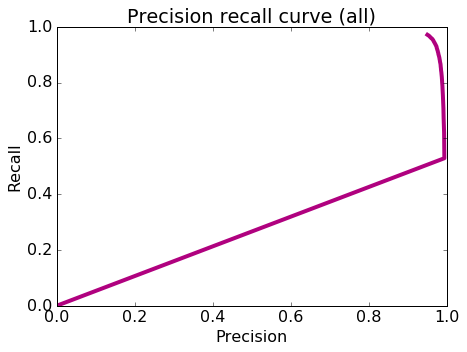

In [77]:
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

In [50]:
threshold_values = np.linspace(0.5, 1, num=100)
print threshold_values

[ 0.5         0.50505051  0.51010101  0.51515152  0.52020202  0.52525253
  0.53030303  0.53535354  0.54040404  0.54545455  0.55050505  0.55555556
  0.56060606  0.56565657  0.57070707  0.57575758  0.58080808  0.58585859
  0.59090909  0.5959596   0.6010101   0.60606061  0.61111111  0.61616162
  0.62121212  0.62626263  0.63131313  0.63636364  0.64141414  0.64646465
  0.65151515  0.65656566  0.66161616  0.66666667  0.67171717  0.67676768
  0.68181818  0.68686869  0.69191919  0.6969697   0.7020202   0.70707071
  0.71212121  0.71717172  0.72222222  0.72727273  0.73232323  0.73737374
  0.74242424  0.74747475  0.75252525  0.75757576  0.76262626  0.76767677
  0.77272727  0.77777778  0.78282828  0.78787879  0.79292929  0.7979798
  0.8030303   0.80808081  0.81313131  0.81818182  0.82323232  0.82828283
  0.83333333  0.83838384  0.84343434  0.84848485  0.85353535  0.85858586
  0.86363636  0.86868687  0.87373737  0.87878788  0.88383838  0.88888889
  0.89393939  0.8989899   0.9040404   0.90909091  0.

In [92]:
probabilities = model.predict_proba(test_matrix)[:,1]
precision_all = []
recall_all = []
from collections import defaultdict
lookup = defaultdict(float)
lookup2 = defaultdict(long)
for threshold in threshold_values:
    
    returned_predictions = apply_threshold(probabilities,threshold)
    precision_all.append(cal_precision(returned_predictions))
    recall_all.append(cal_recall(returned_predictions))
    lookup[cal_precision(returned_predictions)] = threshold
    lookup2[threshold] = cal_precision(returned_predictions)
print lookup2[0.5]
    

0.949384262158


In [113]:
from sklearn.metrics import recall_score
def cal_recall(predictions):
    #recall = recall_score(y_true=test_data['sentiment'].to_numpy(),
                      #y_pred=predictions.to_numpy())
    recall = recall_score(y_true=baby_reviews['sentiment'].to_numpy(),
                      y_pred=predictions.to_numpy())
    return recall
    


In [111]:
from sklearn.metrics import precision_score
def cal_precision(predictions):
    #precision = precision_score(y_true=test_data['sentiment'].to_numpy(), 
                            #y_pred=predictions.to_numpy())
    precision = precision_score(y_true=baby_reviews['sentiment'].to_numpy(), 
                            y_pred=predictions.to_numpy())
    return precision


C:\Users\OmarAbdelwahab\AppData\Anaconda2\envs\gl-env\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


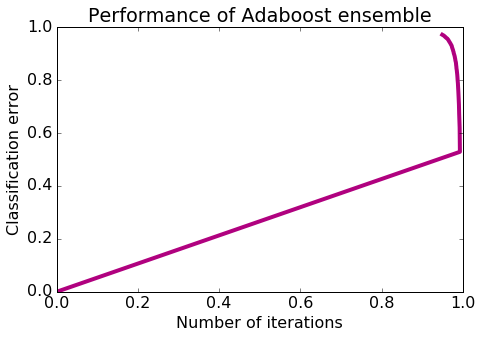

In [58]:
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')
make_figure(dim=(10,5), title='Performance of Adaboost ensemble',
            xlabel='Number of iterations',
            ylabel='Classification error',
            legend='best')

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [90]:
print lookup2[0.5]

0.949384262158


In [106]:
baby_reviews = test_data[test_data['name'].apply(lambda x: 'baby' in x.lower())]

In [108]:
baby_matrix = vectorizer.transform(baby_reviews['review_clean'])
probabilities = model.predict_proba(baby_matrix)[:,1]

In [114]:
#probabilities = model.predict_proba(test_matrix)[:,1]
precision_all = []
recall_all = []
from collections import defaultdict
lookup = defaultdict(float)
lookup2 = defaultdict(long)
for threshold in threshold_values:
    
    returned_predictions = apply_threshold(probabilities,threshold)
    precision_all.append(cal_precision(returned_predictions))
    recall_all.append(cal_recall(returned_predictions))
    lookup[cal_precision(returned_predictions)] = threshold
    lookup2[threshold] = cal_precision(returned_predictions)


In [109]:
threshold_values = np.linspace(0.5, 1, num=100)